#Introduction to Clustering#

In this tutorial we will see some libraries of scikit for clustering. You can read more about clustering in SciKit here:

http://scikit-learn.org/stable/modules/clustering.html

In [ ]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

%matplotlib inline

Generate data from Gaussian distributions. 

More on data generation here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


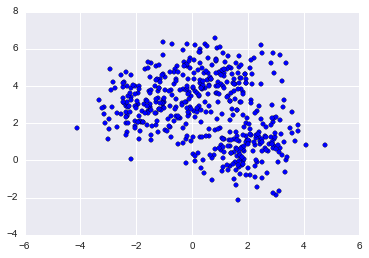

In [196]:
centers = [[1,1], [-1, -1], [1, -1]]
X, true_labels = sk_data.make_blobs(n_samples=500, centers=3, n_features=2,center_box=(-10.0, 10.0),random_state=0)
#X, true_labels = sk_data.make_blobs(n_samples=500, centers=centers, n_features=2,center_box=(-10.0, 10.0),cluster_std = 0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


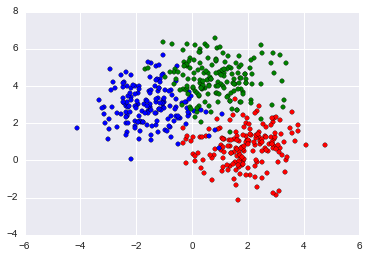

In [197]:
plt.scatter(X[true_labels==1,0], X[true_labels==1,1],c = 'r')
plt.hold
plt.scatter(X[true_labels==2,0], X[true_labels==2,1],c = 'b')
plt.hold
plt.scatter(X[true_labels==0,0], X[true_labels==0,1],c = 'g')

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


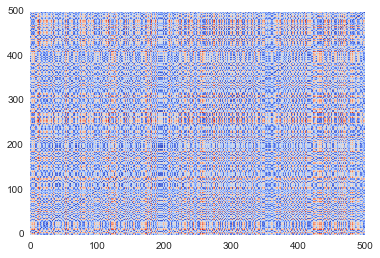

In [172]:
euclidean_dists = metrics.euclidean_distances(X)
plt.pcolor(euclidean_dists,cmap=plt.cm.coolwarm)

###K-means clustering ###

More on the k-means clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


In [181]:
import sklearn.cluster as sk_cluster

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print (labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  881.789570914

Cluster labels
[0 2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 1 0 2 0 0 1 1 2 0 2 1 2 0 2 2 0 0 2 1 1 1
 1 1 1 2 0 0 1 1 0 1 0 2 2 0 0 0 0 2 2 1 1 0 1 1 2 1 1 1 2 1 1 2 0 2 0 0 2
 1 2 1 1 1 0 0 0 2 0 2 1 2 2 2 2 0 0 1 0 2 1 2 0 2 0 1 2 2 0 0 1 0 1 0 1 0
 0 1 2 2 1 2 1 1 2 2 1 0 2 2 0 2 0 2 0 1 0 2 1 0 1 2 2 1 0 0 0 2 1 0 0 0 1
 1 0 1 0 0 0 1 0 2 1 2 0 1 1 2 2 2 1 0 1 0 1 2 2 1 0 0 2 2 1 1 1 1 1 2 2 1
 1 0 1 2 2 2 0 1 1 0 2 1 0 2 1 2 1 0 0 2 1 1 1 2 2 0 1 1 2 2 0 2 0 2 2 1 2
 1 1 0 0 0 1 2 0 0 2 0 1 2 2 0 1 0 0 0 1 1 1 0 2 2 2 2 2 1 2 2 0 2 2 0 1 2
 1 1 0 0 1 1 0 2 1 2 1 1 2 1 0 2 1 0 1 1 1 1 2 1 0 0 0 0 2 2 2 1 2 2 0 0 1
 2 0 2 1 0 1 2 1 0 2 0 1 0 2 1 2 2 0 2 0 1 2 2 0 0 1 0 1 0 0 0 1 0 2 1 1 1
 2 1 1 0 2 2 2 1 2 1 0 0 0 1 0 2 2 1 0 2 2 2 1 1 1 1 2 0 1 2 0 0 0 1 0 2 0
 2 2 0 2 2 0 2 1 1 2 1 0 2 0 2 0 0 2 1 2 2 1 0 1 0 1 2 2 0 0 1 0 1 2 2 0 1
 2 1 2 0 0 2 1 1 0 0 1 2 2 0 2 1 0 2 0 1 0 2 0 0 1 0 0 0 0 1 0 1 2 1 2 0 2
 1 2 1 2 1 0 2 1 1 1 1 1 0 2 1 

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


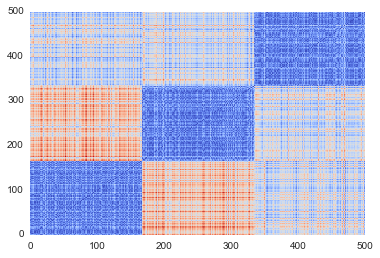

In [174]:
idx = np.argsort(kmeans_labels) # returns the indices in sorted order
rX = X[idx,:]
r_euclid = euclidean_dists[idx,:][:,idx]
plt.pcolor(r_euclid,cmap=plt.cm.coolwarm)

Confusion matrix: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Homogeneity and completeness: http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness

Precision: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Recall: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

[[ 12   4 151]
 [  3 162   2]
 [154   3   9]]


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


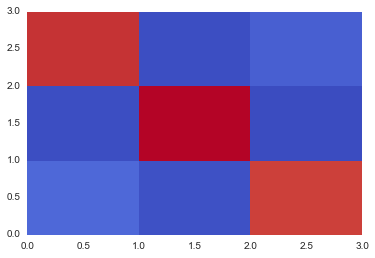

In [182]:
C= metrics.confusion_matrix(true_labels,kmeans_labels)
print (C)
plt.pcolor(C,cmap=plt.cm.coolwarm)

In [183]:
h = metrics.homogeneity_score(true_labels,kmeans_labels)
print(h)
c = metrics.completeness_score(true_labels,kmeans_labels)
print(c)
v = metrics.v_measure_score(true_labels,kmeans_labels)
print(v)
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print(r)
p = metrics.precision_score(true_labels,kmeans_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,kmeans_labels, average = 'weighted')
print(r)

0.749703757499
0.749835439427
0.749769592681
[ 0.07100592  0.95857988  0.05555556]
[ 0.07185629  0.97005988  0.05421687]
0.362326101249
0.366


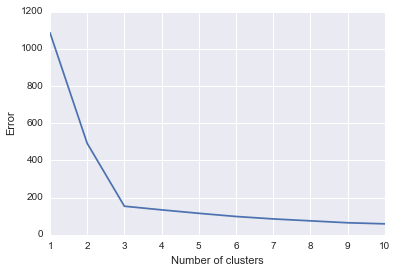

In [178]:
error = np.zeros(11)
error[0] = 0;
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


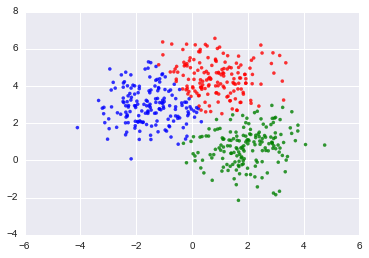

In [184]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[kmeans_labels].tolist(), s=10, alpha=0.8)

###Agglomerative Clustering###

More on Agglomerative Clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

[[  1   0 166]
 [  1 166   0]
 [165   1   0]]


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


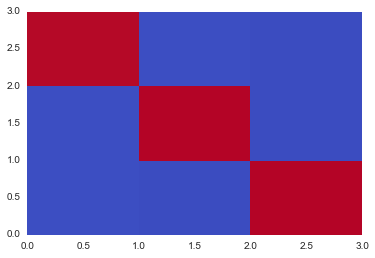

In [186]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
agglo_labels = agglo.fit_predict(X)

C_agglo= metrics.confusion_matrix(true_labels,agglo_labels)
print (C_agglo)
plt.pcolor(C_agglo,cmap=plt.cm.coolwarm)

Another way to do agglomerative clustering using SciPy:
    
http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

In [187]:
import scipy.cluster.hierarchy as hr
Z = hr.linkage(X, method='complete', metric='euclidean')

print (Z.shape, X.shape)

(499, 4) (500, 2)


Hierarchical clustering returns a 4 by (n-1) matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


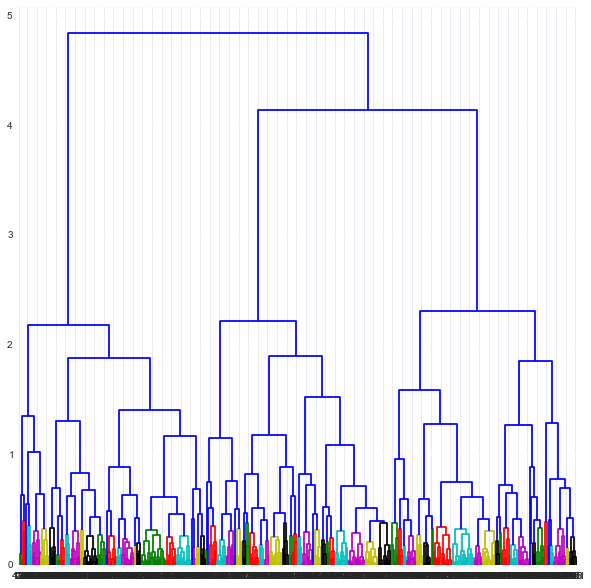

In [188]:
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4)
fig.show()

[244, 257, 388, 432, 127, 254, 6, 174, 197, 209, 481, 53, 435, 267, 423, 190, 460, 446, 248, 14, 456, 325, 278, 404, 164, 96, 452, 199, 272, 118, 489, 463, 144, 166, 106, 360, 296, 10, 56, 425, 121, 123, 25, 472, 71, 167, 343, 34, 61, 124, 335, 454, 172, 478, 219, 107, 320, 3, 466, 252, 490, 154, 438, 312, 442, 230, 240, 399, 450, 35, 236, 232, 455, 283, 434, 315, 104, 308, 341, 476, 302, 57, 317, 66, 457, 395, 270, 429, 91, 260, 342, 467, 180, 390, 141, 259, 261, 290, 431, 382, 484, 13, 99, 168, 223, 268, 373, 185, 215, 156, 311, 473, 483, 408, 84, 461, 65, 298, 488, 42, 202, 413, 479, 361, 433, 2, 48, 170, 449, 161, 262, 362, 224, 234, 375, 384, 286, 139, 331, 132, 5, 119, 293, 225, 149, 204, 94, 147, 370, 418, 102, 358, 354, 427, 480, 58, 345, 492, 245, 319, 496, 214, 265, 269, 233, 377, 98, 327, 474, 421, 193, 227, 109, 60, 116, 44, 122, 138, 133, 101, 126, 68, 134, 186, 183, 191, 113, 151, 176, 381, 77, 246, 439, 279, 385, 33, 192, 364, 195, 277, 159, 8, 353, 307, 38, 41, 29, 258,

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


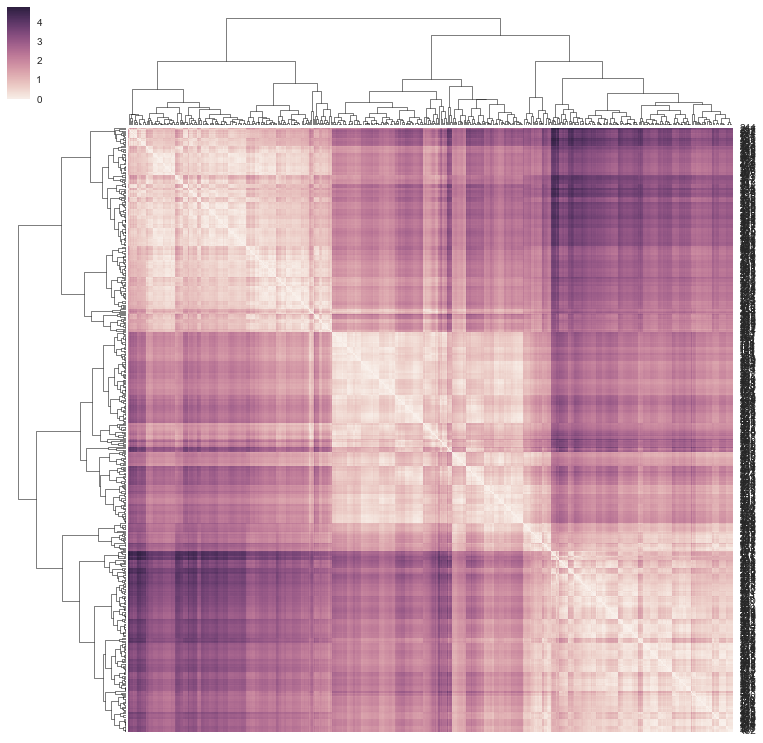

In [189]:
distances = metrics.euclidean_distances(X)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print (cg.dendrogram_col.reordered_ind)

###DBSCAN Algorithm ###

More on DBSCAN here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [200]:
dbscan = sk_cluster.DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)
C = metrics.confusion_matrix(true_labels,dbscan.labels_)
print (C)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [58 87  0  6  0  0  0  7  0  0  9]
 [68  0  0  0  0  0 92  1  0  6  0]
 [41 15 13 18 66  7  1  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


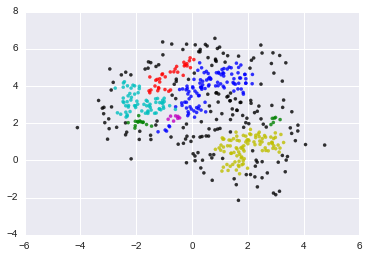

In [201]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_labels].tolist(), s=10, alpha=0.8)

##Clustering text data##

SciKit datasets: http://scikit-learn.org/stable/datasets/

We will use the 20-newsgroups datasets which consists of postings on 20 different newsgroups. 

More information here: http://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset 

An example of what we want to do:
http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

In [204]:
categories = ['alt.atheism', 'sci.space','rec.sport.baseball']
news_data = sk_data.fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
#print (news_data.target, len(news_data.target))
print (news_data.target_names)

['alt.atheism', 'rec.sport.baseball', 'sci.space']


In [213]:
print (type(news_data))
print (news_data.filenames)
print (news_data.target[:10])
print (news_data.data[0])
print (len(news_data.data))

<class 'sklearn.datasets.base.Bunch'>
[ 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\53136'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\51300'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61216'
 ...,
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\104509'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\105103'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60225']
[0 0 2 1 1 2 1 0 2 0]

That's okay:  it's what all the rest of them who come on here say...


This isn't the guy who was a lawyer was he?  Could you give more info on this
guy (never mind- I'm sure there will be PLENTY of responses to this post, and
it will appear there)


This is true.  Make sure it is true for ALL cases.
  

Why not both?  ;)
 

Why 

###Text processing###

Python offers a set of tools for extracting features:http://scikit-learn.org/stable/modules/feature_extraction.html

Including the feature extraction from text:
http://scikit-learn.org/stable/modules/classes.html#text-feature-extraction-ref

TfIdfVectorizer transforms text into a sparse matrix where rows are text and columns are words, and values are the tf-dif values. It performs tokenization, normalization, and removes stop-words. More here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [207]:
import sklearn.feature_extraction.text as sk_text
#vectorizer = sk_text.CountVectorizer(min_df=1)
vectorizer = sk_text.CountVectorizer(min_df=1,stop_words = 'english')

corpus = ['This is the first document.',
           'This is the second second document.',
           'And the third one.',
           'Is this the first document?',
          ]
X = vectorizer.fit_transform(corpus)
print(X)                              

  (0, 0)	1
  (1, 0)	1
  (1, 1)	2
  (3, 0)	1


In [209]:
vectorizer = sk_text.TfidfVectorizer(
                            #stop_words='english',
                             #max_features = 1000,
                             min_df=1)
X = vectorizer.fit_transform(corpus)
print(X)  
print (vectorizer.get_feature_names())

  (0, 1)	0.438776742859
  (0, 2)	0.541976569726
  (0, 6)	0.358728738248
  (0, 3)	0.438776742859
  (0, 8)	0.438776742859
  (1, 5)	0.853225736145
  (1, 1)	0.272301467523
  (1, 6)	0.222624292325
  (1, 3)	0.272301467523
  (1, 8)	0.272301467523
  (2, 4)	0.552805319991
  (2, 7)	0.552805319991
  (2, 0)	0.552805319991
  (2, 6)	0.28847674875
  (3, 1)	0.438776742859
  (3, 2)	0.541976569726
  (3, 6)	0.358728738248
  (3, 3)	0.438776742859
  (3, 8)	0.438776742859
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [218]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)
print(type(data))

<class 'scipy.sparse.csr.csr_matrix'>


In [219]:
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

array([2, 2, 1, ..., 1, 1, 2])

In [220]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 year
 team
 game
 games
 baseball
 runs
 hit
 good
 think
 pitching
Cluster 1:
 space
 just
 like
 know
 thanks
 nasa
 time
 launch
 does
 moon
Cluster 2:
 god
 people
 don
 think
 say
 just
 religion
 does
 islam
 atheism


In [221]:
C = metrics.confusion_matrix(news_data.target,kmeans.labels_)
print (C)
p = metrics.precision_score(news_data.target,kmeans.labels_, average=None)
print(p)
r = metrics.recall_score(news_data.target,kmeans.labels_, average = None)
print(r)

[[  1 162 317]
 [361 227   9]
 [  1 564  28]]
[ 0.00275482  0.23819517  0.07909605]
[ 0.00208333  0.38023451  0.04721754]


In [226]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3,)
dense = data.todense()
agglo_labels = agglo.fit_predict(dense) # agglomerative needs dense data

C_agglo= metrics.confusion_matrix(news_data.target,agglo_labels)
print (C_agglo)

[[105  13 362]
 [150  29 418]
 [173  92 328]]


In [224]:
dbscan = sk_cluster.DBSCAN(eps=0.1)
dbscan_labels = dbscan.fit_predict(data)
C = metrics.confusion_matrix(news_data.target,dbscan.labels_)
print (C)

[[  0   0   0   0]
 [468  12   0   0]
 [568  29   0   0]
 [576  17   0   0]]
